# Data Mining - P3:Question 6
### Kouveris N. Dimitrios  |  cse42730@cs.uoi.gr
We are going to read some chat conversation texts.  
We'll keep a train and a sample set then try to identify toxic (rude) comments.

In [1]:
import pandas as pd
import math
import random
import re
import matplotlib.pyplot as plt
import os
import collections
import sys
from scipy.sparse import hstack
import numpy as np
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from utilities import show_top_vectorizer_features

%matplotlib inline

## Parsing and reading Training Data

In [2]:
train = pd.read_csv('../dataset/toxic/train.csv')
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

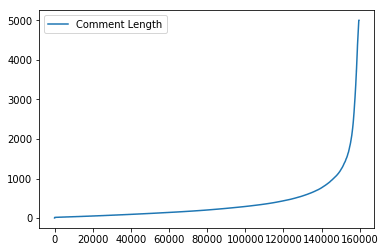

In [4]:
# plot length of texts
def plotlist(l, lbl):
    x = range(len(l))
    plt.plot(x, l, label=lbl)
    plt.legend()
    plt.show()

plotlist(sorted([len(x) for x in train["comment_text"]]), "Comment Length")

In [5]:
# check some texts
for i in range(10):
    print(train["comment_text"][i*20])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
"

 Regarding your recent edits 

Once again, please read WP:FILMPLOT before editing any more film articles.  Your edits are simply not good, with entirely too many unnecessary details and very bad writing.  Please stop before you do further damage. -''''''The '45 "
"
 Sure, but the lead must briefly summarize Armenia's history. I simply added what I found necessary. If anyone thinks this or that sentence is redundant for the lead, they are welcome to remove make edits.  talk  "
Locking this page would also violate WP:NEWBIES.  Whether you like it or not, conservatives are Wikipedians too.
"

Minimization of textile effluent

A proposed deletion template has been added to the article Minimization of textile effluent, suggesti

In [6]:
# print number of each text type
vals = {}
for c in columns:
    print("%-35s" % ("Total " + c.title() + " comments:"), train[c].sum())

Total Toxic comments:               15294
Total Severe_Toxic comments:        1595
Total Obscene comments:             8449
Total Threat comments:              478
Total Insult comments:              7877
Total Identity_Hate comments:       1405


In [7]:
# check for spam by calculating unique words of a text
for t in train["comment_text"]:
    unique_len = len(set(t.split()))
    all_len = len(t.split())
    perc = int(unique_len*100 / all_len)
    if perc < 30:
        print(t.replace("\n", " ") + " \n")

"  Orphaned non-free image (Image:KSV Hessen Kassel.png)  Thanks for uploading Image:KSV Hessen Kassel.png. The image description page currently specifies that the image is non-free and may only be used on Wikipedia under a claim of fair use. However, the image is currently orphaned, meaning that it is not used in any articles on Wikipedia. If the image was previously in an article, please go to the article and see why it was removed. You may add it back if you think that that will be useful. However, please note that images for which a replacement could be created are not acceptable for use on Wikipedia (see our policy for non-free media).  If you have uploaded other unlicensed media, please check whether they're used in any articles or not. You can find a list of 'image' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any non-f


fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bitches.fuck u bi

FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU 

Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weezer okay?Is weeze

USE THE RIGHT TEMPLATE n00b!    USE THE RIGHT TEMPLATE n00b!    USE THE RIGHT TEMPLATE n00b!    USE THE RIGHT TEMPLATE n00b!    USE THE RIGHT TEMPLATE n00b!    USE THE RIGHT TEMPLATE n00b!  == USE THE RIGHT TEMPLATE n00b! ==   USE THE RIGHT TEMPLATE n00b!    USE THE RIGHT TEMPLATE n00b!  == USE THE RIGHT TEMPLATE n00b! ==   USE THE RIGHT TEMPLATE n00b!    USE THE RIGHT TEMPLATE n00b!  == USE THE RIGHT TEMPLATE n00b! ==   USE THE RIGHT TEMPLATE n00b!    USE THE RIGHT TEMPLATE n00b!  == USE THE RIGHT TEMPLATE n00b! ==   USE THE RIGHT TEMPLATE n00b!    USE THE RIGHT TEMPLATE n00b! 

heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitler! heil hitle

CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MOTHER FUCKER DON'T FUCKING BAN ME PENIS! CURPS YOU MO

I LIKE CHICKEN!  NUM NUMS IN MY TUM TUMS!!!!!'I LIKE CHICKEN!  NUM NUMS IN MY TUM TUMS!!!!!'I LIKE CHICKEN!  NUM NUMS IN MY TUM TUMS!!!!!'I LIKE CHICKEN!  NUM NUMS IN MY TUM TUMS!!!!!'I LIKE CHICKEN!  NUM NUMS IN MY TUM TUMS!!!!!'I LIKE CHICKEN!  NUM NUMS IN MY TUM TUMS!!!!!'I LIKE CHICKEN!  NUM NUMS IN MY TUM TUMS!!!!!'I LIKE CHICKEN!  NUM NUMS IN MY TUM TUMS!!!!!'I LIKE CHICKEN!  NUM NUMS IN MY TUM TUMS!!!!!'I LIKE CHICKEN!  NUM NUMS IN MY TUM TUMS!!!!!'I LIKE CHICKEN!  NUM NUMS IN MY TUM TUMS!!!!!'I LIKE CHICKEN!  NUM NUMS IN MY TUM TUMS!!!!!' 

SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT SHIT 

DUST FILTER, IF YOU RVV IT AGAIN! I WILL FUCKIN KILL YOU! I WILL BLOCK YOU, I WILL BLANK YOUR TALK PAGE, I WILL STEAL YOUR PASSWORD, I WILL TAKE OVER YOU! I WILL BLOCK YOU!   DUST FILTER, IF YOU RVV IT AGAIN! I WILL FUCKIN KILL YOU! I WILL BLOCK YOU, I WILL BLANK YOUR TALK PAGE, I WILL STEAL YOUR PASSWORD, I WILL TAKE OVER YOU! I WILL BLOCK YOU!   DUST FILTER, IF YOU RVV IT AGAIN! I WILL FUCKIN KILL YOU! I WILL BLOCK YOU, I WILL BLANK YOUR TALK PAGE, I WILL STEAL YOUR PASSWORD, I WILL TAKE OVER YOU! I WILL BLOCK YOU!  DUST FILTER, IF YOU RVV IT AGAIN! I WILL FUCKIN KILL YOU! I WILL BLOCK YOU, I WILL BLANK YOUR TALK PAGE, I WILL STEAL YOUR PASSWORD, I WILL TAKE OVER YOU! I WILL BLOCK YOU!   DUST FILTER, IF YOU RVV IT AGAIN! I WILL FUCKIN KILL YOU! I WILL BLOCK YOU, I WILL BLANK YOUR TALK PAGE, I WILL STEAL YOUR PASSWORD, I WILL TAKE OVER YOU! I WILL BLOCK YOU!   DUST FILTER, IF YOU RVV IT AGAIN! I WILL FUCKIN KILL YOU! I WILL BLOCK YOU, I WILL BLANK YOUR TALK PAGE, I WILL STEAL YOUR PAS


BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS  BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS  BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS  BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS  BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS  BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS  BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUTTSECKS BUT

oli is a dickhead oli is a dickheadItalic text oli is a dickhead oli is a dickheadItalic text  oli is a dickhead oli is a dickheadItalic text oli is a dickhead oli is a dickheadItalic text  oli is a dickhead oli is a dickheadItalic text oli is a dickhead oli is a dickheadItalic text  oli is a dickhead oli is a dickheadItalic text oli is a dickhead oli is a dickheadItalic text  oli is a dickhead oli is a dickheadItalic text oli is a dickhead oli is a dickheadItalic text  oli is a dickhead oli is a dickheadItalic text oli is a dickhead oli is a dickheadItalic text 

were THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST THE BEST T

"  ""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it.""""Bitch, suck my dick before I slap you with it

In [8]:
# check for invalid large words
for t in train["comment_text"]:
    lrg = [x for x in t.split() if len(x) > 25]
    if lrg:
        print(lrg)

['Wikipedia:Good_article_nominations#Transport']
['http://www.its.caltech.edu/~atomic/snowcrystals/myths/myths.htm#perfection']
['(Wikipedia_talk:WikiProject_Classical_music/Archive_5#Need_help.21Wikipedia_talk:WikiProject_Music/Archive_3#I_could_use_some_helpWikipedia_talk:WikiProject_Music/Archive_2#Raulbot.2C_and_the_music_list)', 'http://digg.com/music/Wikipedia_has_free_classical_music_downloads']
['gays/Gypsys/Slavs/anyone...']
['‘Buckminster-Fuller-carbon-nanotubes’']
['http://www.constitution.ie/reports/ConstitutionofIreland.pdf', 'http://www.constitution.ie/reports/mbunreachtnaheireann.pdf']
['https://ml.wikipedia.org/wiki/സംവാദം:മോസ്കോ_മെട്രോ.']
['Talk:Jewish_lobby#WP:V_-_comparing_Jewish_Virtual_Library_and_Dissident_Voice.']
['http://www.iranchamber.com/personalities/farabi/farabi.php', 'http://www.islam.org.br/%C2%A0al_farabi.htm', 'http://www.superbeyin.com/sohbet/sohbet.htm']
['http://books.google.com/books?id=HHev0U1GfpEC&pg;=PA51&dq;=Thiyya+matrilineal&hl;=en&sa;=X&ei;

['Skip->Match->Contains->Category:Living']
['(Tîj-Tijr-Tig-Tigr-Tigris).']
['style=""background:transparent""', 'style=""background-color:#""', 'style=""background-color:#""', 'style=""vertical-align:top;']
['http://books.google.co.in/books?ei=QsMfU6D0CIr9rAep54DgBw&id;=bfAMAQAAMAAJ&dq;=communities%2Csegments&focus;=searchwithinvolume&q;=nanded', 'https://en.wikipedia.org/wiki/Talk:Raju/Archive_2#Raju_caste_and_Kshatriya_status']
['http://en.wikipedia.org/wiki/Flashspring.']
['http://en.wikipedia.org/wiki/Western_Chalukyas']
['investigations/Shravanshetty502']
['Wikipedia:Templates_for_deletion/Log/2006_December_9#Template:Stones']
['address...................818', 'City/State/Zipcode...............Los', 'Referral:................July,']
['http://onlinelibrary.wiley.com/doi/10.1002/bem.20403/abstract;jsessionid=58BB2FDAA1322DB50ADB06D305F41969.d03t04']
['http://film.guardian.co.uk/Feature_Story/feature_story/0,,138286,00.html', 'http://www.3ammagazine.com/litarchives/nov2001/manchester

['(http://www.islamonline.net/English/News/2005-11/18/article02.shtml,']
['Image:StIgnatiusCCFbadge.jpg', ':Image:StIgnatiusCCFbadge.jpg', 'Image:OldignatiansBadge.jpg', ':Image:OldignatiansBadge.jpg']
['Image:Bennynovember1989.jpg', 'Image:Bennynovember1989.jpg']
['(general)#John-the-younger.']
['https://diva.sfsu.edu/collections/sfbatv/bundles/206378']
['space......spellbound/entranced..lost']
['You!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!', 'It!!!!!!!!!!!!!!!!!!!!!!!!!']
['HAHAHAHAHAHAHAHAHAHAHAHAHA', 'HAHAHAHAHAHAHAHAHAHAHAHAHA', 'HAHAHAHAHAHAHAHAHAHAHAHAHA', 'HAHAHAHAHAHAHAHAHAHAHAHAHA', 'HAHAHAHAHAHAHAHAHAHAHAHAHA', 'HAHAHAHAH

['http://en.wikipedia.org/wiki/Lynch_syndrome']
['http://en.wikipedia.org/wiki/The_Angel%2C_Islington', 'http://en.wikipedia.org/wiki/Hope_and_Anchor%2C_Islington', 'http://en.wikipedia.org/wiki/Dingwalls', 'http://en.wikipedia.org/wiki/100_Club', 'http://en.wikipedia.org/wiki/Jazz_Caf%C3%A9']
['USA/NATO/Albanian/Croats/Muslims']
['http://my.opera.com/AaryanRajput/blog/.']
['garciniacambogiaprofacts.com/forskolinfit-pro/']
['ELIGIBILITY/CERTIFICATE/THEORY']
['http://www.facebook.com/pages/AussieLegend-Beeblebrox-and-MuZemike-Suz-on-Wikipedia/114746305242314?ref=ts76.241.128.119']
['http://www.wsj.com/article/SB121993453813079803.html?mod=psp_mostpop', 'http://www.wsj.com/article/SB121993453813079803.html?mod=psp_mostpop', 'http://www.wsj.com/article/SB122002615833483595.html?mod=Politics-and-Policy']
['permissions-en@wikimedia.org', 'http://post.thing.net/about', 'http://www.wolfgangstaehle.info/pages.php?content=resume.php&navGallID;=Resume', 'http://en.wikipedia.org/wiki/The_Thing_%2

['Wikipedia:Deletion_review/Active.']
['http://www.wondercomments.com/i_love_you/i_love_you_comment_09.gif']
['http://en.wikipedia.org/wiki/Wikipedia:Facebook', 'https://encyclopediadramatica.es/Wikipedia']
['contraception...""http://www.vatican.va/roman_curia/pontifical_councils/family/documents/rc_pc_family_doc_12021997_vademecum_en.html']
['http://en.wikipedia.org/wiki/Talk:Soursop#Toxicity_of_plant_seeds']
['""local-kid-gets-mocked-a-little-bit-online""']
['""http://en.wikipedia.org/wiki/Megan%27s_Law""']
['https://en.wikipedia.org/wiki/User:Corinna.jpg/Para_Site']
['2602:FFEA:1:131:0:0:0:D348']
['http://en.wikipedia.org/wiki/Special:EmailUser/fatum81']
['style=""text-align:center;""']
['Template:Wikiportal:India/news.']
['friends/allies/meat-puppets/jyronies']
['http://en.wikipedia.org/wiki/Talk:Star_Wars#Why_don.27t_we_talk_about_Star_Wars.27_prodigious_impact_on_pop_culture_in_the_opening_paragraph.3F']
['deletion/Wikipedia:Version']
['MOGLUCY!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

['http://halakhah.com/gittin/gittin_57.html#PARTb']
['http://en.wikipedia.org/w/index.php?title=Wikipedia:Requests_for_page_protection&oldid;=137392411']
['(country)#Requested_Move_-_July_2006.']
['http://en.wikipedia.org/wiki/Wikipedia:ELYES']
['www.russianspaceweb.com/2007.html']
['permissions@wikimedia.org.']
['style=""background-color:#F5FFFA;', 'style=""background-color:#F5FFFA;""', 'style=""vertical-align:top;', 'background-color:#F5FFFA""']
['Wikipedia:Requests_for_arbitration/Liancourt_Rocks/Evidence#Faking.2Fasserting_non-existent_consensus.']
['Love_and_Death:_The_Murder_of_Kurt_Cobain?']
['http://en.wikipedia.org/wiki/Wikipedia:Vandalism']
['""https://en.wikipedia.org/wiki/List_of_nearest_stars_and_brown_dwarfs"",']
['http://www.wyrdlight.com/nately/nately.html']
['nicknam...*coughassumegoodfaithcough*188.222.227.22']
['https://en.wikipedia.org/w/index.php?title=Orban&diff;=629385234&oldid;=621348395']
['http://www.phact.org/e/dennis4.html', 'http://www.nuscam.com/eric_krieg

['http://www.medalerts.org/vaersdb/findfield.php?LOWAGE=&HIGHAGE;=&VAX;=ROTHB5&SEX;=&VAXCNT;=&STATE;=&VAXMAN;=&VAX;_DATE_LOW=&VAX;_DATE_HIGH=&VAXLOT;=&ONSET;_DATE_LOW=&ONSET;_DATE_HIGH=&VAXDOSE;=&SUB;_DATE_LOW=&SUB;_DATE_HIGH=&VAXROUTE;=&REPORT;_DATE_LOW=&REPORT;_DATE_HIGH=&VAXSITE;=&L;_THREAT=&PRIOR;_VAX=&ER;_VISIT=&CUR;_ILL=&HOSPITAL;=&HISTORY;=&X;_STAY=&SYMPTOMS;=&RECOVD;=&LAB;_DATA=&DISABLE;=&OTHER;_MEDS=&DIED;=Yes&V;_ADMINBY=&DEATH;_DATE_LOW=&DEATH;_DATE_HIGH=&V;_FUNDBY=&PAGENO;=1&action;=Find&PERPAGE;=10&SORTING;=NONE', 'http://www.cbsnews.com/stories/2008/07/25/cbsnews_investigates/main4296175.shtml']
['http://en.wikipedia.org/w/index.php?title=Talk:Samuel&action;=edit&section;=15']
['http://en.wikipedia.org/wiki/Wikipedia:Templates_for_deletion#Template:Turkish_History_Brief']
['User_talk:Blackson#Religious_bias']
['http://news.softpedia.com/news/Deathbed-Maths-Theory-Proven-Correct-100-Years-Later-317814.shtml', 'http://www.dailymail.co.uk/sciencetech/article-2254352/Deathbed-

['http://encarta.msn.com/encyclopedia_761555715_9/hinduism.html']
['noticeboard/Incidents#Next']
['deletion/User:Tswiss321/sandbox']
['style=""background-color:#F5FFFA;', 'style=""background-color:#F5FFFA;""', 'style=""vertical-align:top;', 'background-color:#F5FFFA""']
['Wikipedia:Articles_for_deletion/Terrorists_of_Pakistani_origin', 'Wikipedia:Articles_for_deletion/Terrorists_of_Pakistani_origin.']
['Canadians(/Mexicans/Brazilians)']
['http://www.beckjord.com/electricrepairs/yelldg.jpg', '__________________________________________________"']
['http://www.harrisoncoparks.com/BTP.html']
["D'Hondthttp://www.bbc.co.uk/news/uk-england-london-17769428."]
['http://en.wikipedia.org/wiki/Trial_by_ordeal', 'http://en.wikipedia.org/wiki/Fourth_Lateran_Council', 'http://en.wikipedia.org/wiki/Magna_Carta', 'http://www.statutelaw.gov.uk/content.aspx?activeTextDocId=1517519']
['http://www.solargeneral.com/library/lightningsun.pdf']
['Wikipedia_talk:Featured_list_criteria#Fair_Use_images']
['http:/

['(http://en.wikipedia.org/wiki/National_Civilian_Community_Corps),', 'http://www.foxnews.com/story/0,2933,188385,00.html', 'http://www.enterstageright.com/archive/articles/1000americorps.htm""', 'http://www.enterstageright.com/archive/articles/1000americorps.htm', 'http://www.enterstageright.com/archive/articles/1000americorps.htm.']
['http://www.stopcoloncancernow.com"']
['style=""border-spacing:8px;margin:0px', 'vertical-align:top;color:#000""|', 'style=""vertical-align:top;', 'background-color:#faf5ff""']
['c-71-202-196-50.hsd1.ca.comcast.net']
['http://penbay.org/samizu/awards/samizu_awards.html.']
['Wikipedia:USEP/Courses/Writing']
['http://en.wikipedia.org/wiki/User:Yngvarr,', 'http://en.wikipedia.org/wiki/User:Elaich', 'http://en.wikipedia.org/wiki/User:DietLimeCola']
['http://www.google.com/search?client=safari&rls;=en&q;=pashtun+people&oe;=UTF-8&um;=1&ie;=UTF-8&hl;=en&tbm;=isch&source;=og&sa;=N&tab;=wi&biw;=1383&bih;=1068&sei;=bfvGTveKMaLb0QGn7I31Dw#um=1&hl;=en&client;=safari

['everything-round-is-a-planet,']
['Singapore-Malpensa-Barcelona']
['http://en.wikipedia.org/wiki/Wikipedia:Biographies_of_living_persons#Using_the_subject_as_a_self-published_source']
['User:StarShineAcademy/Starshine', 'deletion/User:StarShineAcademy/Starshine']
["Map-TurkicLanguagesGroups'", 'File:Map-TurkicLanguagesGroups.png.Have']
['http://en.wikipedia.org/wiki/User:AlexNewArtBot/IndonesiaSearchResult']
['http://en.wikipedia.org/wiki/Template:Syrian_Civil_War_detailed_map#Ashma']
['Wikipedia_talk:AutoWikiBrowser/Feature_requests#Add_tooltip_texts_to_.22Skip_if_no_cat_changed.22_and_.22Remove_sortkey.22']
['talk:Avicennasis|ennasis]]']
['http://www.warbirdregistry.org/c123registry/c123registry.html', '(http://registry.faa.gov/aircraftinquiry/acftinqSQL.asp?striptxt=C123&mfrtxt;=Fairchild&cmndfind.x;=0&cmndfind.y;=0&cmndfind;=submit&modeltxt;=C-123']
['book|last1=Morgan|first1=Joan|title=When', 'Schuter|isbn=0684822628|pages=49-62|accessdate=Nov']
['"76.212.185.67|76.212.185.67]]']

['(http://www.uefa.com/uefachampionsleague/news/newsid=1619754.html)', '(http://www.goal.com/en-sg/news/3882/spain/2012/09/10/3365101/mascherano-playing-at-centre-back-for-barcelona-is-a-risk).']
['User:Dominican,User:VirtualDelight']
['http://developers.facebook.com/news.php?blog=1&story;=246']
['http://en.wikipedia.org/w/index.php?title=Johnny_Behan&action;=historysubmit&diff;=341431931&oldid;=341431797', 'http://en.wikipedia.org/w/index.php?title=Johnny_Behan&diff;=next&oldid;=341431931']
['http://online.wsj.com/article/SB125893981183759969.html', 'http://www.nytimes.com/2011/01/31/business/media/31link.html?_r=1', 'http://articles.businessinsider.com/2009-11-23/tech/30012937_1_new-editors-jimmy-wales-wikipedia']
['http://www.youtube.com/watch?v=lMuTiziCszU)', 'http://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Aldrin_Apollo_11_original.jpg/179px-Aldrin_Apollo_11_original.jpg', 'http://upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Aldrin_Apollo_11.jpg/180px-Aldrin_Apollo_1

['http://www.bonhamsandgoodman.com.au/about_auction_news_view.php?article=89', 'Image:AmericanFL-USA-states.PNG', 'Image:AmericanFL-USA-states.PNG,']
['http://www.xtimeline.com/evt/view.aspx?id=15752,', 'http://en.wikipedia.org/wiki/Lenin_Peace_Prize,']
['https://developer.nvidia.com/opengl-driver']
['style=""background-color:#F5FFFA;""', 'style=""vertical-align:top;', 'background-color:#F5FFFA""']
['http://messageboard.tokyopop.com/forums/showthread.php?t=2285']
['http://en.wikipedia.org/wiki/The_Archaeology_of_Knowledge', 'http://en.wikipedia.org/wiki/Fact']
['http://en.wikipedia.org/wiki/Yechiexcept']
['deletion/User:NewOneLike/sandbox']
['Email:sales1@novelbattery.com']
['Wikipedia:Consensus#Reaching_consensus_through_discussion.']
['ohiomediawatch.wordpress.com']
['""Lithium_(pharmaceutical)"".']
['http://don.logan.com/aboutus.htm']
['http://en.wikipedia.org/wiki/Talk:Abortion/Archive_41#Misuse_of_the_words_.22elective.22_and_.22therapeutic.22_2']
['style=""background-color:#F5FFF

['(List_of_fictional_characters_on_the_autistic_spectrum)']
['http://www.fotw.net/images/d/dk-chris.gif', 'http://flagspot.net/flags/"")']
['[[User_talk:Danielfolsom|folsom]]']
['Wikipedia:Vandalism#Warnings.']
['statement:http://www.tuksfm.co.za/Chart.aspx?DETAILID=7']
['https://en.wikipedia.org/wiki/8_prime_spirals', 'https://github.com/evandrix/Splat/tree/master/code/demo/pyprimes-0.1.1a/pyprimes-tests', 'https://mail.python.org/pipermail/tutor/2011-December/087209.html']
['User:Anothersliceofhistory']
['deletion/Wikipedia:Article']
['http://www.knowhiphop.com/the-game-puts-rap-down-and-might-be-a-fourth-album/article/500.htm']
['Talk:Transylvania#TRANSILVANIA.3DARDEAL.3F.3F.3FThen_where_is_BANAT.3F.3F.3FIN_CHINA_.3F.3F.3F,']
['http://www.nba.com/raptors/roster/2012']
['http://www.smh.com.au/opinion/society-and-culture/so-thats-three-different-stories-from-polanskis-latest-accuser-20100519-vf36.html']
['Talk:E%3DMC%C2%B2_(Mariah_Carey_album)#Concerns_Part_2']
['http://www.getphpbb.c

['British_Isles_naming_dispute)"".', 'encyclopaedia!...(kiwiexile']
['http://www.omniglot.com/writing/kurdish.htm', 'http://www.institutkurde.org/en/language/', 'http://www.kurdishacademy.org/?q=node/41', 'http://www.krg.org/p/p.aspx?l=12&p;=215']
['http://www.zundelsite.org/zundel_persecuted/aug10_rally.html', 'http://zundelsite.org/zundel_persecuted/free_zundel_rally_nov23.html', 'http://flagspot.net/flags/at-index.html#land']
['aviator/Hollywood/Military']
['Talk:Kamen_Rider_Decade#Requested_move']
['http://www.YudelKrinsky.com']
['「[[Special:Contributions/Dinoguy1000|千？！]]」?']
['http://www.theage.com.au/opinion/a-defence-force-of-terminators-is-almost-here-20090510-az6u.html?page=2', 'http://www.google.com/search?q=2^10&ie;=utf-8&oe;=utf-8&aq;=t),']
['[http://www.nytimes.com/2006/0']
['2602:306:BD61:E0F0:DC43:6AD0:8320:410A']
['(http://www.anusha.com/susan-polgars-lawsuit.pdf)']
['Image:MaS.Kelly-Nayane.jpg', 'Image:MaS.Kelly-Nayane.jpg.']
['http://www.publications.parliament.uk/pa

['2403:7900:ADE1:A1DE:250:56FF:FEA6:3B1F']
['http://www.talkingpix.co.uk/Books_Gene%20Roddenberry.html']
['Image:Buddhabrot-deep.jpg,']
['===========================================================================']
['http://www.pwc.com/en_US/us/issues/ifrs-reporting/publications/assets/pwc-ifrs-by-country-2014.pdf']
['WP:NOTNEWS,WP:NOTSOCIALNETWORK/WP:NOTFACEBOOK/WP:NOTTWITTER/WP:NOTLINKEDIN.—']
['[Wikipedia:Requests_for_adminship/FayssalF|RfA]].']
['http://www.mebaroverseers.org/']
['distribution/availability)']
['=(Price_1+Price_2+Price_3)/3-Right']
['https://twitter.com/team911lotus/status/374997156899221504']
['woooooooooooooooooh!!!!!!!!!!!!!!!!!!!']
['http://en.wikipedia.org/wiki/Wikipedia:What_Wikipedia_is_not#Wikipedia_is_not_an_indiscriminate_collection_of_information']
['as-yet-uncomfirmed-by-the-BBC,']
['http://en.wikipedia.org/wiki/User_talk:173.160.115.74']
['homosexuals!76.105.223.232']
['Wikipedia:Requests_for_comment/Dr1819']
['https://en.wikipedia.org/wiki/List_of_mul

['style=""background:transparent""', 'style=""background-color:#""', 'style=""background-color:#""', 'style=""vertical-align:top;']
['http://meta.wikimedia.org/wiki/Right_to_Vanish']
['(Image:Shiaencyclopedia.gif)', 'Image:Shiaencyclopedia.gif.']
['http://en.wikipedia.org/wiki/Talk:Roman_Empire/Archive_5#Resolving_the_Roman.2FByzantine_mess.']
['people!!!!!!!!!!!..................LOL']
['noticeboard/Incidents#Legal']
['http://forums.somethingawful.com/showthread.php?threadid=2587275', '[IMG]http://img443.imageshack.us/img443/6724/icantspellmynamexv1.jpg[/IMG]', 'http://en.wikipedia.org/wiki/User:PHDrillSergeant', 'http://en.wikipedia.org/wiki/User:PHDrillSergeant/boxes', 'http://www.myspace.com/porphyrichemophiliac', 'http://www.okcupid.com/profile?u=PHDrillSergeant', 'http://www.tv.com/users/PHDrillSerg...eviews;author;7', 'http://www.imdb.com/title/tt0492878/usercomments']
['http://www.worldsportgroup.com/assets/events/football/', 'http://www.worldsportgroup.com/assets/events/golf/',

['talk:Francophonie&Androphiliemy;']
['http://www.nytimes.com/2010/09/05/arts/television/05schimmel.html']
['http://www.businessweek.com/magazine/content/02_48/b3810019.htm']
['http://www.unix.org/what_is_unix.html']
['http://propagandapress.org/2007/02/21/fuck-bubba-by-saab-lofton/', 'http://propagandapress.org/2007/02/26/man-fuck-florida-talking-shit-about-cuba-saab-lofton/', 'http://activistsinlasvegas.blogspot.com/2006/12/rules-for-whites-by-saab-lofton.html']
['Wikipedia_talk:WikiProject_Norway#.22Landscape.22.']
['http://www.facebook.com/group.php?gid=114991129127', 'http://www.sheryar.net/downloads.html.', 'http://www.karathesinger.com/']
['Death_of_Marwa_El-Sherbini']
['(http://www.bbc.co.uk/news/technology-19813382).', 'http://defensedistributed.com/products/']
['https://en.wikipedia.org/w/index.php?title=Princess_Marina_of_Greece_and_Denmark&oldid;=prev&diff;=648322927']
['https://es.wikipedia.org/wiki/Bandurria_(instrumento_musical)']
['whore!!!!!!!!!!!!!!!!!!!!!!!!!!!!']
['

['andreas_pechtl@hotmail.com']
["{{#ifeq:true|true|==|'''}}Hello", "{{#ifeq:true|true|==|'''}}", '[[Special:Contributions/Luke', '{{#switch:{{{icons}}}|true=:', "'''|*}}[[Wikipedia:Introduction|Introduction]]{{#if:{{{icons|}}}|'''|}}", '{{#switch:{{{icons}}}|true=:', "Wikipedia]]{{#if:{{{icons|}}}|'''|}}", '{{#switch:{{{icons}}}|true=:', "page]]{{#if:{{{icons|}}}|'''|}}", '{{#switch:{{{icons}}}|true=:', "'''|*}}[[Help:Contents|Help]]{{#if:{{{icons|}}}|'''|}}", '{{#switch:{{{icons}}}|true=:', "'''|*}}[[Wikipedia:Article", "article]]{{#if:{{{icons|}}}|'''|}}", '{{#switch:{{{icons}}}|true=:', "Style]]{{#if:{{{icons|}}}|'''|}}", '{{#switch:{{{anon|}}}|true=I', "'''[{{fullurl:Special:Userlogin|type=signup}}", '[[Wikipedia:Username#Inappropriate', '[[Wikipedia:Username|username]]', '[[Wikipedia:Watchlist|watchlist]]', 'there.{{#if:{{{1|}}}|{{{1}}}|', '}}{{#if:{{{nosig|}}}||Again,', '}}{{#if:{{{border|}}}||}}"']
['http://www.palestinefacts.org/pf_early_palestine_name_origin.php']
['States|cla

## Cleaning Texts
Based on the above we can now clean the texts.

In [9]:
# i won't need the dataframe next.
values = {c:train[c] for c in columns}
texts = [t for t in train["comment_text"]]
del train
len(texts), len(values["toxic"])

(159571, 159571)

In [10]:
# replace newlines  and convert texts to lower case
texts = [text.replace("\n", " ") for text in texts]

In [11]:
# remove large words
for i in range(len(texts)):
    texts[i] = " ".join([w for w in texts[i].split() if len(w) < 25])

In [12]:
# remove duplicates
tmp = set([x for x, count in collections.Counter(texts).items() if count == 1])
tmp = [i for i, x in enumerate(texts) if x in tmp]
texts = [texts[i] for i in tmp]
for c in columns:
    values[c] = [values[c][i] for i in tmp]
len(texts), len(values["toxic"])

(159023, 159023)

In [13]:
# convert texts to list of words and back to text
# ex: "Hi my name's shady." -> "Hi my name 's shady ."
from nltk.tokenize import word_tokenize
texts = [" ".join(word_tokenize(x)) for x in texts]

In [14]:
# remove special chars except this -> '
texts = [re.sub(r"[^A-Za-z0-9']+", " ", text) for text in texts]

In [15]:
# lemmatization and stemming
# ex: ponies -> poni, cats -> cat
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer 

lem = WordNetLemmatizer()
stem = PorterStemmer()

for i, text in enumerate(texts):
    texts[i] = " ".join([stem.stem(lem.lemmatize(word, "v")) for word in text.split()])
    print(str(100*i/len(texts))[:4], end="\r")

In [16]:
# remove clean comments with length greater than 4000
# (we already have too much clean comments)

clean_ind = {}
for i in range(len(texts)):
    s = 0
    for c in columns:
        s += values[c][i]
    if s == 0:
        clean_ind[i] = True

tmp = [i for i, t in enumerate(texts) if not(i in clean_ind and len(t) > 4000)]

texts = [texts[i] for i in tmp]
for c in columns:
    values[c] = [values[c][i] for i in tmp]
len(texts)

158598

In [17]:
# convert texts to lowercase
texts = [t.lower() for t in texts]

In [18]:
# fix spelling mistakes on the mother of toxic words
rep = {
    "[f]+[u]+[c]+[k]+": "fuck",
    "fukc": "fuck",
    "fcuk": "fuck",
    "nlgga": "nigga"
}

regex = re.compile("(%s)" % "|".join(map(re.escape, rep.keys()))) # single pass to replace
texts = [regex.sub(lambda mo: rep[mo.string[mo.start():mo.end()]], text) for text in texts]

In [19]:
# remove texts with length lower than 6
tmp = [i for i, text in enumerate(texts) if len(text) >= 5]
texts = [texts[i] for i in tmp]
for c in columns:
    values[c] = [values[c][i] for i in tmp]

## Testing
Let's check what we've done so far by creating our tfidfvectorizer and our classifier.

*I've picked those with that parameters after a lot testing.*

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.80,
    ngram_range=(1,2),
    smooth_idf=False,
    sublinear_tf=True
)

vectors = vectorizer.fit_transform(texts)

In [21]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(
    loss="log",
    penalty="l1",
    alpha=5**-8,
    max_iter=15,
    n_jobs=-1,
    random_state=42
)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

raucs = []
accuracies = []

for c in columns:
    X_train, X_test, y_train, y_test = train_test_split(
        vectors,
        values[c],
        test_size=0.20,
        random_state=42
    )
    
    classifier.fit(X_train, y_train)
    predictions = classifier.predict_proba(X_test)
    
    rauc = roc_auc_score(y_test, predictions[:,1])
    raucs.append(rauc)
    
    acc = classifier.score(X_test, y_test)
    accuracies.append(acc)

    print("%-20s" % (c+" | Rauc"), rauc)
    print("%-20s" % (c+" | Accuracy"), acc, "\n")

print("Average accuracy: ", sum(accuracies)/len(accuracies))
print("Average RAUC: ", sum(raucs)/len(raucs))

toxic | Rauc         0.9766660523785413
toxic | Accuracy     0.9609333123127858 

severe_toxic | Rauc  0.9860976152690811
severe_toxic | Accuracy 0.9892479899101372 

obscene | Rauc       0.987275908649174
obscene | Accuracy   0.979221188711966 

threat | Rauc        0.980603453520318
threat | Accuracy    0.9971622260759893 

insult | Rauc        0.9812472963012306
insult | Accuracy    0.9712123600819801 

identity_hate | Rauc 0.9809773516112635
identity_hate | Accuracy 0.99265331861895 

Average accuracy:  0.9817383992853013
Average RAUC:  0.9821446129549348


## Applying on test dataset
Before applying we need to clean the train dataset using the same method we used on cleaning train dataset.

In [23]:
def clean(text):
    text = text.replace("\n", " ")
    text = " ".join(word_tokenize(text))
    text = re.sub(r"[^A-Za-z0-9']+", " ", text)
    text = " ".join([stem.stem(lem.lemmatize(word, "v")) for word in text.split()])
    text = text.lower()
    text = regex.sub(lambda mo: rep[mo.string[mo.start():mo.end()]], text)
    return text

test = pd.read_csv('../dataset/toxic/test.csv')
texts = [clean(text) for text in test["comment_text"]]
test_vectors = vectorizer.transform(texts)
predictions = {}

for c in columns:
    print("Fit", c)
    classifier.fit(vectors, values[c])
    predictions[c] = classifier.predict_proba(vectors)

with open("../dataset/toxic/submission-toxic.csv", "w") as f:
    f.write("id,toxic,severe_toxic,obscene,threat,insult,identity_hate\n")
    for i in range(len(test)):
        uid=test["id"][i]
        vals = ",".join([str(predictions[c][i][1]) for c in columns])
        f.write(uid + "," + vals + "\n")

print("CREATED ../dataset/toxic/submission-toxic.csv")

Fit toxic
Fit severe_toxic
Fit obscene
Fit threat
Fit insult
Fit identity_hate
CREATED ../dataset/toxic/submission-toxic.csv


## Results
This submission scored `0.9774` RAUC on kaggle. At the date of submission my position was 693/1827

## Notes
First I've created another notebook `other/question6-first.ipynb` which contains some deeper analysis, then I moved on creating this one which is cleaner and produces a better solution. I'm turning it in just in case this one looks incomplete.

Other things I tried but without good results.
- Remove spam comments
- Fix words spelling
- Create a new train set using the predictions
- Other classifiers
- Other vectorizers
- Combining words and char vectorizers
- Remove numbers

All of the above gave me about `-0.01` rmse (except classifier and vectorizers which gave worst results).